In [10]:
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
import os.path as pth
import openmdao.api as om
import logging
import shutil
import fastoad.api as oad


DATA_FOLDER_PATH = "data"

WORK_FOLDER_PATH = "workdir"
CONFIGURATION_FILE = pth.join(WORK_FOLDER_PATH, "oad_sizing.yml")
SOURCE_FILE = pth.join(DATA_FOLDER_PATH, "CeRAS01_baseline.xml")

# For having log messages on screen
logging.basicConfig(level=logging.INFO, format="%(levelname)-8s: %(message)s")

# For using all screen width
from IPython.core.display import display, HTML

display(HTML("<style>.container { width:95% !important; }</style>"))

In [3]:
shutil.copy(pth.join(DATA_FOLDER_PATH, "oad_sizing.yml"), CONFIGURATION_FILE)

'workdir\\oad_sizing.yml'

In [4]:
oad.generate_inputs(CONFIGURATION_FILE, SOURCE_FILE, overwrite=True)

INFO    : Loading FAST-OAD plugin bundled
INFO    : Loading bundles from fastoad.models
INFO    : Installed bundle fastoad.models.performances.mission.segments.hold (ID 27 )
INFO    : Installed bundle fastoad.models.__init__ (ID 35 )
INFO    : Installed bundle fastoad.models.performances.mission.openmdao.mission_wrapper (ID 19 )
INFO    : Installed bundle fastoad.models.performances.mission.mission_definition.mission_builder (ID 13 )
INFO    : Installed bundle fastoad.models.performances.__init__ (ID 34 )
INFO    : Installed bundle fastoad.models.performances.mission.exceptions (ID 11 )
INFO    : Installed bundle fastoad.models.performances.mission.base (ID 10 )
INFO    : Installed bundle fastoad.models.performances.mission.segments.speed_change (ID 28 )
INFO    : Installed bundle fastoad.models.performances.mission.mission_definition.resources.__init__ (ID 14 )
INFO    : Installed bundle fastoad.models.performances.mission.segments.altitude_change (ID 24 )
INFO    : Installed bundle f

'C:\\Users\\PC\\PycharmProjects\\FAST-PEDAGO\\Presentation\\workdir\\problem_inputs.xml'

In [15]:
conf = oad.FASTOADProblemConfigurator("data/oad_sizing.yml") # reads the configuration file
#conf.write_needed_inputs("data/CeRAS01_baseline.xml") # you may skip this step if you already generated your input file
problem = conf.get_problem(read_inputs=True) # here you get an OpenMDAO problem (with only a few additions)
problem.setup()

In [16]:
problem1=om.Problem()
problem1.model=problem.model

In [17]:
# Here you may add your recorder using the OpenMDAO way
recorder = om.SqliteRecorder("record.sql")
problem1.model.nonlinear_solver.add_recorder(recorder)
problem1.model.nonlinear_solver.recording_options['includes'] = ['*']


In [18]:
# You run the problem normally
#problem1.setup()
problem1.run_model()

RuntimeError: Problem problem5: The `setup` method must be called before `run_model`.

In [10]:
# To get FAST-OAD outputs, you have to use the method we have added
# to our slightly modified Problem class: 
problem.write_outputs()

TypeError: cannot pickle 'sqlite3.Connection' object

In [89]:
#oad.generate_configuration_file(CONFIGURATION_FILE, overwrite=True)

# The above generated configuration uses the quick and simple Breguet module to compute performances.
# If you want to use the more accurate, much more CPU-costly time-step integration, uncomment and run
# the next line:
shutil.copy(pth.join(DATA_FOLDER_PATH, "oad_23.yml"), CONFIGURATION_FILE)

'workdir\\oad_23.yml'

In [90]:
oad.generate_inputs(CONFIGURATION_FILE, SOURCE_FILE, overwrite=True)

RuntimeError: <model> <class FASTOADModel>: Output not found for response 'data:geometry:wing:span'.

In [85]:
oad.list_variables(CONFIGURATION_FILE)

NAME,I/O,DESCRIPTION
data:TLAR:approach_speed,IN,top-level requirement: approach speed
data:aerodynamics:aircraft:landing:CL_max,IN,maximum lift coefficient in landing conditions
data:geometry:wing:aspect_ratio,IN,wing aspect ratio
data:geometry:wing:root:thickness_ratio,IN,thickness ratio at wing root
data:geometry:wing:tip:thickness_ratio,IN,thickness ratio at wing tip
data:weight:aircraft:MFW,IN,maximum fuel weight
data:weight:aircraft:MLW,IN,maximum landing weight
data:weight:aircraft:sizing_block_fuel,IN,block fuel quantity (i.e. loaded before taxi-out) used for sizing process
data:aerodynamics:aircraft:landing:additional_CL_capacity,OUT,"at landing, is equal to (maximum lift coefficient)-(maximum required lift coefficient)"
data:geometry:wing:area,OUT,wing reference area


In [86]:
XDSM_FILE = pth.join(WORK_FOLDER_PATH, 'xdsm.html')
oad.write_xdsm(CONFIGURATION_FILE, XDSM_FILE, overwrite=True)
from IPython.display import IFrame
IFrame(src=XDSM_FILE, width='100%', height='500px')

Analysis FASTOADModel pushed


In [19]:
import ipywidgets as widgets

ModuleNotFoundError: No module named 'openpyxl'

In [9]:
import csv

In [10]:

 
# Création de 3 listes vides pour chaque type de données:
identifiant=[]
nom=[]
prenom=[]
# Ouverture du fichier
path='data\Module.csv'
fichier=open(path,"r")
# Lecture du fichier
contenu=csv.reader(fichier,delimiter=";")
# Ajout des différentes données dans les listes vides
for row in contenu:
    identifiant.append(row[0])
    nom.append(row[1])
# fermeture du fichier
fichier.close()

In [11]:
identifiant

['Nom',
 'data:TLAR:NPAX',
 'data:TLAR:cruise_mach',
 'data:geometry:cabin:aisle_width',
 'data:geometry:cabin:exit_width',
 'data:geometry:cabin:seats:economical:count_by_row',
 'data:geometry:cabin:seats:economical:length',
 'data:geometry:cabin:seats:economical:width',
 'data:geometry:has_T_tail',
 'data:geometry:horizontal_tail:MAC:at25percent:x:from_wingMAC25',
 'data:geometry:horizontal_tail:area',
 'data:geometry:horizontal_tail:aspect_ratio',
 'data:geometry:horizontal_tail:sweep_25',
 'data:geometry:horizontal_tail:taper_ratio',
 'data:geometry:horizontal_tail:wetted_area',
 'data:geometry:propulsion:engine:count',
 'data:geometry:propulsion:engine:y_ratio',
 'data:geometry:propulsion:layout',
 'data:geometry:vertical_tail:area',
 'data:geometry:vertical_tail:aspect_ratio',
 'data:geometry:vertical_tail:sweep_25',
 'data:geometry:vertical_tail:taper_ratio',
 'data:geometry:vertical_tail:wetted_area',
 'data:geometry:wing:MAC:at25percent:x',
 'data:geometry:wing:area',
 'data:g

In [12]:
nom

['Description',
 'top-level requirement: number of passengers, assuming a classic eco/business class repartition',
 'top-level requirement: cruise Mach number',
 'width of aisles',
 'width of exits',
 'number of economical class seats along width',
 'length of economical class seats',
 'width of economical class seats',
 '0=horizontal tail is attached to fuselage / 1=horizontal tail is attached to top of vertical tail',
 'distance along X between 25% MAC of wing and 25% MAC of horizontal tail',
 'horizontal tail area',
 'aspect ratio of horizontal tail',
 'data:geometry:horizontal_tail:sweep_25',
 'taper ratio of horizontal tail',
 'wetted area of horizontal tail',
 'number of engines',
 'engine position with respect to total span',
 'position of engines (1=under the wing / 2=rear fuselage)',
 'vertical tail area',
 'aspect ratio of vertical tail',
 'sweep angle at 25% chord of vertical tail',
 'taper ratio of vertical tail',
 'wetted area of vertical tail',
 'X-position of the 25% of 

In [13]:
from ipywidgets import Layout, Button, VBox, FloatText,Label,HBox

items_layout = Layout(width='auto')     # override the default width of the button to 'auto' to let the button grow

box_layout = Layout(border='solid',
                    width='auto')
style = {'description_width': 'initial'}

items = [Label(value=word, layout=items_layout,style=style) for word in identifiant]
box1 = VBox(children=items)
i=0
item=[]
while(i<len(identifiant)):
    
    f=FloatText()
    item.append(f)
    i=i+1
box2=VBox(children=item)
ITEM=[box1,box2]
HBox(children=ITEM)

In [14]:
item[0].value=20

In [8]:
from tkinter import *
def fen():
    window = Tk()
    window.title("Apprendre tkinter")
    window.mainloop()
    return window

In [ ]:
fenetre=fen()

In [56]:
path='data\mod.csv'

In [57]:
table=pd.read_csv(path)

In [58]:
print(table)

                                                  Nom
0                                      data:TLAR:NPAX
1                               data:TLAR:cruise_mach
2                     data:geometry:cabin:aisle_width
3                      data:geometry:cabin:exit_width
4   data:geometry:cabin:seats:economical:count_by_row
5         data:geometry:cabin:seats:economical:length
6          data:geometry:cabin:seats:economical:width
7                            data:geometry:has_T_tail
8   data:geometry:horizontal_tail:MAC:at25percent:...
9                  data:geometry:horizontal_tail:area
10         data:geometry:horizontal_tail:aspect_ratio
11             data:geometry:horizontal_tail:sweep_25
12          data:geometry:horizontal_tail:taper_ratio
13          data:geometry:horizontal_tail:wetted_area
14              data:geometry:propulsion:engine:count
15            data:geometry:propulsion:engine:y_ratio
16                    data:geometry:propulsion:layout
17                   data:ge

In [62]:
tab1=table=pd.read_csv(path)T.values.tolist()[0]

TypeError: string indices must be integers

In [68]:
liste

['data:TLAR:cruise_mach',
 0                                        data:TLAR:NPAX
 1                                 data:TLAR:cruise_mach
 2                       data:geometry:cabin:aisle_width
 3                        data:geometry:cabin:exit_width
 4     data:geometry:cabin:seats:economical:count_by_row
 5           data:geometry:cabin:seats:economical:length
 6            data:geometry:cabin:seats:economical:width
 7                              data:geometry:has_T_tail
 8     data:geometry:horizontal_tail:MAC:at25percent:...
 9                    data:geometry:horizontal_tail:area
 10           data:geometry:horizontal_tail:aspect_ratio
 11               data:geometry:horizontal_tail:sweep_25
 12            data:geometry:horizontal_tail:taper_ratio
 13            data:geometry:horizontal_tail:wetted_area
 14                data:geometry:propulsion:engine:count
 15              data:geometry:propulsion:engine:y_ratio
 16                      data:geometry:propulsion:layout
 17  

In [70]:
liste[1]

0                                        data:TLAR:NPAX
1                                 data:TLAR:cruise_mach
2                       data:geometry:cabin:aisle_width
3                        data:geometry:cabin:exit_width
4     data:geometry:cabin:seats:economical:count_by_row
5           data:geometry:cabin:seats:economical:length
6            data:geometry:cabin:seats:economical:width
7                              data:geometry:has_T_tail
8     data:geometry:horizontal_tail:MAC:at25percent:...
9                    data:geometry:horizontal_tail:area
10           data:geometry:horizontal_tail:aspect_ratio
11               data:geometry:horizontal_tail:sweep_25
12            data:geometry:horizontal_tail:taper_ratio
13            data:geometry:horizontal_tail:wetted_area
14                data:geometry:propulsion:engine:count
15              data:geometry:propulsion:engine:y_ratio
16                      data:geometry:propulsion:layout
17                     data:geometry:vertical_ta

KeyError: 'Nom'

In [28]:
print(table)

                                                                                      Nom;Description
data:TLAR:NPAX;top-level requirement: number of...   assuming a classic eco/business class reparti...
data:TLAR:cruise_mach;top-level requirement: cr...                                                NaN
data:geometry:cabin:aisle_width;width of aisles                                                   NaN
data:geometry:cabin:exit_width;width of exits                                                     NaN
data:geometry:cabin:seats:economical:count_by_r...                                                NaN
data:geometry:cabin:seats:economical:length;len...                                                NaN
data:geometry:cabin:seats:economical:width;widt...                                                NaN
data:geometry:has_T_tail;0=horizontal tail is a...                                                NaN
data:geometry:horizontal_tail:MAC:at25percent:x...                                

In [29]:
ligne=table.loc[1,'Nom']

KeyError: 'Nom'

In [5]:
print(table.head)

<bound method NDFrame.head of   Nom;Prenom;Note
0   SY;Ousmane;10
1    KA;Moussa;15
2     SY;Demba;16
3      SY;Pate;17
4      SY;Diop;18
5      SY;Seck;19
6       SY;Sow;20
7   DIA;Moussa;21
8    DIA;Fatou;22
9     DIA;Coly;23>


KeyError: 1

In [69]:
# The MDA process menu
import ipywidgets as widgets
from ipywidgets import Button, Layout,HBox,VBox
import csv
def csv_into_table(path):
    table = []
    f = open(path)
    myreader = csv.reader(f, delimiter=';')
    headings = next(myreader)

    for row in myreader:
        table.append(row[0])
    return table
def Menu():
    h1=widgets.HTML(
    value=" <b>MDA Menu</b>",
)
    table=csv_into_table('data\menu.csv')
   
    layout=Layout(width='16.5%', height='80px', border='2px solid green')     
    # override the default width of the button to 'auto' to let the button grow
    Menu_layout = Layout(border='4px solid black',width='100%',padding='10px')
    box_layout = widgets.Layout(display='flex',flex_flow='column',align_items='center',width='50%')
    but = [Button(description=word, layout=layout, style=dict(button_color='lightgreen')) for word in table]
    box2 = HBox(children=but,layout=Menu_layout)
    box1 = widgets.HBox(children=[h1],layout=box_layout)
    form = VBox(children=[box1,box2], layout=Layout(border='6px solid green', padding='10px', align_items='center', width='100'))
    display(form)


In [70]:
men=Menu()

In [ ]:
eval_problem = oad.evaluate_problem(CONFIGURATION_FILE, overwrite=True)

NL: NLBGS Converged in 2 iterations


INFO    : Computation finished after 9.28 seconds
INFO    : Problem outputs written in C:\Users\PC\PycharmProjects\FAST-PEDAGO\Presentation\workdir\problem_outputs.xml


In [ ]:
oad.variable_viewer(eval_problem.output_file_path)

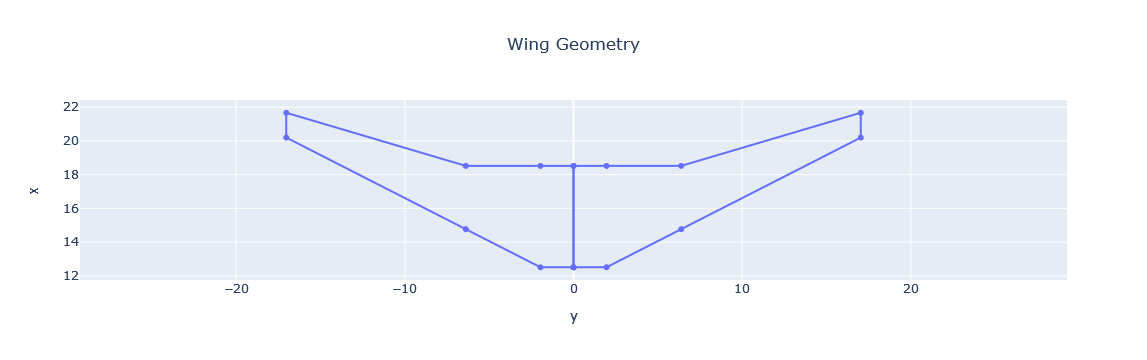

In [ ]:
fig = oad.wing_geometry_plot(eval_problem.output_file_path, name="FAST-OAD")
fig.show()

In [ ]:
oad.aircraft_geometry_plot(eval_problem.output_file_path)

FigureWidget({
    'data': [{'mode': 'lines+markers',
              'type': 'scatter',
              'uid': '9…

In [ ]:
N2_FILE = pth.join(WORK_FOLDER_PATH, "n2.html")
oad.write_n2(CONFIGURATION_FILE, N2_FILE, overwrite=True)
from IPython.display import IFrame

IFrame(src=N2_FILE, width="100%", height="500px")

INFO    : N2 diagram written in C:\Users\PC\PycharmProjects\FAST-PEDAGO\Presentation\workdir\n2.html


In [ ]:
XDSM_FILE = pth.join(WORK_FOLDER_PATH, 'xdsm.html')
oad.write_xdsm(CONFIGURATION_FILE, XDSM_FILE, overwrite=True)
from IPython.display import IFrame
IFrame(src=XDSM_FILE, width='100%', height='500px')

Analysis FASTOADModel pushed
